# Board Game Rating Prediction (Term Project)
## Name: Jay Nitin Chaphekar
## UTA ID: 1001763932

## Introduction
This project is based on the NLP (Natural Language Processing) domain which includes the analysing text data and predicting sentiments based on the user reviews. This includes analyzing the data removing stopwords, creating vocabulary of meaningful words, finding the best classfier with suitable hyperarameters and based on that predicting the rating of the review 

## Project Description
The goal of this project is to predict ratings of the given game reviews by the users. After selecting a best model hosting it to the website for good user experience.


### Importing Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import pickle
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Reading Data



In [2]:
data=pd.read_csv('C:/Users/chaph/Desktop/DM/archive/bgg-15m-reviews.csv')
data.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic


By looking at the data we can see that the data has six columns. For the rating prediction we only need rating and the comment columns.

In [3]:
data=data.iloc[:,[2,3]]
data['comment'] = data['comment'].str.lower()

In [4]:
len(data["comment"])


15823269

By looking at the data we can see that our data has more positive data than the negative data and has more reviews with rating 7-8.

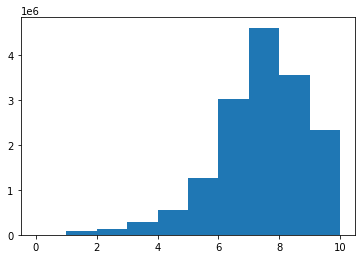

In [5]:
plt.hist(data["rating"])
plt.show()

In [6]:
data.rating.value_counts()

7.00000    3566154
8.00000    3002815
6.00000    2346047
9.00000    1424911
5.00000    1077762
            ...   
6.48204          1
7.25410          1
9.00040          1
4.59100          1
2.20600          1
Name: rating, Length: 10172, dtype: int64

## Preprocessing the data

### Dropping null values 

In [7]:
data=data.dropna(subset=["comment"])
data

,rating,comment
1,10.0,hands down my favorite new game of bgg con 200...
2,10.0,i tend to either love or easily tire of co-op ...
4,10.0,this is an amazing co-op game. i play mostly ...
5,10.0,hey! i can finally rate this game i've been pl...
8,10.0,love it- great fun with my son. 2 plays so far...
...,...,...
15823242,10.0,ks collector's bundle with a friend of mine
15823247,10.0,belekokio gerumo...
15823253,10.0,excelente!! lo mejor que probé.
15823264,8.0,turn based preview looks very promising. the g...


### Shuffling the data for the randomness in the predictions

In [8]:
data=data.sample(frac=1)
data

,rating,comment
15534844,10.0,very fun party game. way more creative and int...
10491463,6.0,"the system, while simple and accessible, doesn..."
11794250,8.0,we have had lots of fun playing this game.
7808374,6.0,"just becuase you've added stuff, doesn't mean ..."
15750725,6.0,4+ players
...,...,...
5255190,5.0,it's a good game don't get me wrong almost bei...
1048429,8.0,zawiera dodatek: dodatkowa przyczepa (big expa...
3826211,8.0,very entertaining game with strategic possibil...
12635308,7.5,2015.5 8.7


As the rating values are like 8.6, 8.7, 8.8 we will round off the rating values to get 10 classes for the 10 classifications.

In [10]:
#X=data.iloc[:,1]
X=text_counts
Y= data.iloc[:,0]
Y= np.rint(Y)
Y

15534844    10.0
10491463     6.0
11794250     8.0
7808374      6.0
15750725     6.0
            ... 
5255190      5.0
1048429      8.0
3826211      8.0
12635308     8.0
3517523      7.0
Name: rating, Length: 2995023, dtype: float64

### For this project I will use various classifiers and then will select the best classifier among them
1. Naive Bayes (MultinominalNB and BernouliNB)
2. Decision Tree
3. SVM
4. Ridge Classifier

For this above mentioned classifiers I will try 3 different approaches for document and word processing to get best results

1. CounterVectorization
2. TfidfVectorizer
3. HashingVectorizer

### 1. CounterVectorization:
The count vectorizer is used to tokenize documents and build vocabulary of meaningful words and to encode new documents with vocabulary.. We will tokenize the data and build vocabulary from given review data and then provide that data to our various classifiers to analyze the results.
We will also use n_gram range for our countervectorizer, an n-gram is a contiguous sequence of n items from a given sample of text which will give us a list where n-words will occur frequently 

### Initializing CounterVectorizer

In [9]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['comment'])

### Splitting the dataset into Training, Development and Testing sets

In [11]:
train_set=[]
test_set=[]
dev_set=[]
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=1)

xtrain, xdev, ytrain, ydev = train_test_split(xtrain, ytrain, test_size=0.25, random_state=1) 
xtrain
#train_set, dev_set, test_set = np.split(data, [int(.6*len(data)), int(.8*len(data))])
#print(len(train_set),len(dev_set),len(test_set))

<224626x410683 sparse matrix of type '<class 'numpy.int64'>'
	with 3876698 stored elements in Compressed Sparse Row format>

### Implementing Naive Bayes Algorithm

### MultinomialNB
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification where the data are typically represented as word vector counts.

In [12]:
MNB = MultinomialNB()
MNB.fit(xtrain, ytrain)

MultinomialNB()

In [13]:
predicted = MNB.predict(xdev)
accuracy_score = metrics.accuracy_score(predicted, ydev)

In [14]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

30.00%


In [17]:
print('Smooth naive Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(predicted)))

Smooth naive Classifier Accuracy:  65.982424274801


In [18]:
mnb=accuracy_metric(list(ydev), np.round(predicted))

### BernoulliNB
BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. 

In [19]:
BNB = BernoulliNB()
BNB.fit(xtrain, ytrain)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(xdev),ydev)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

BNB accuracy = 28.61%


In [20]:
print('Smooth BernNb Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(BNB.predict(xdev))))

Smooth BernNb Classifier Accuracy:  64.37710347774987


In [21]:
bnb=accuracy_metric(list(ydev), np.round(BNB.predict(xdev)))

### Decision Tree
Decision Trees are the popular way to to split data based on classes or conditions which are used for both regression and classification tasks. Decision Trees splits the data according to conditions and based on that assigns values to the each node calculating impurity of the classified solution. Here we will be using <b>gini index</b> as our impurity criterion.


In [22]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=20, min_samples_leaf=5).fit(xtrain, ytrain)
predict_y = clf.predict(xdev)
print('Decision tree accuracy: ', metrics.accuracy_score(ydev, predict_y)*100)

Decision tree accuracy:  25.269779368556012


In [23]:
print('Smooth Decision Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(predict_y)))

Smooth Decision Classifier Accuracy:  56.506757839628186


In [24]:
dt=accuracy_metric(list(ydev), np.round(predict_y))

### Support Vector Machine
Support Vector Machine is a very famous machine learning classifier which divides the data into the hyperplanes by separating the classes by drawing different lines according to the data and then selects the best line which is most equidistant from the each class.


In [119]:
clf = svm.LinearSVC(C=1.0, penalty='l2').fit(xtrain, ytrain)
predict_y = clf.predict(xdev)
print('SVM accuracy: ', metrics.accuracy_score(ydev, predict_y))

SVM accuracy:  27.57


In [120]:
print('Smooth SVM Accuracy: ', accuracy_metric(list(ydev), np.round(predict_y)))

Smooth SVM Accuracy:  64.56


In [121]:
svmv=accuracy_metric(list(ydev), np.round(predict_y))

### Ridge Classifier
Ridge classifier is a classification algorithm that uses ridge regression to classify multi-nomial values. For multi-class classification, n_class classifiers are trained in a one-versus-all approach.

In [25]:
rc = RidgeClassifier()
rc.fit(xtrain, ytrain)
score = rc.score(xtrain, ytrain)


In [26]:
srv=rc.predict(xdev)
print('Ridge Classifier Accuracy: ', metrics.accuracy_score(ydev, srv))

Ridge Classifier Accuracy:  0.2878225332549816


In [27]:
print('Ridge Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(srv)))

Ridge Classifier Accuracy:  65.78342860195522


In [30]:
rcv=accuracy_metric(list(ydev), np.round(srv))

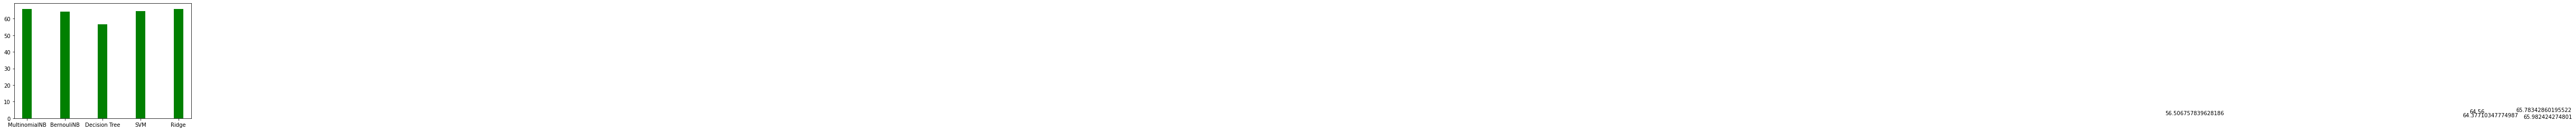

In [43]:
acc=[mnb,bnb,dt,svmv,rcv]
val=['MultinomialNB','BernouliNB','Decision Tree','SVM','Ridge']
plt.bar(val,acc, color='g',width=0.25)


### Smoothing:
Smoothing plays an important role in improving accuracy. In this data we can see that our models predicted values very poorly,that is because of the 10 different rating classes each being checked for the exact value. As part of smoothing we can consider rating one below and above is same as the actual rating this will improve our accuracy dramatically.

In [16]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i] or actual[i] == predicted[i]+1 or actual[i] == predicted[i]-1:
            correct += 1
    return correct / float(len(actual)) * 100.0

### 2. TF- IDF:
TF-IDF is a short for Term Frequency- Inverse Document Frequency which denotes how a word is important to the document which means that the word has more occurance in the vocabulary and inversely propotional to the occurance in the document gives the importance of the given word.

In [45]:
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(data['comment'])

xtrain, xtest, ytrain, ytest = train_test_split(text_count_2, Y, test_size=0.2, random_state=1)

xtrain, xdev, ytrain, ydev = train_test_split(xtrain, ytrain, test_size=0.25, random_state=1) 


MNB.fit(xtrain, ytrain)
accuracy_score_mnb_tf = metrics.accuracy_score(MNB.predict(xdev), ydev)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb_tf*100))+'%')

accuracy_score_mnb = 27.18%


In [69]:
print('Smooth naive Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(predicted)))

Smooth naive Classifier Accuracy:  65.982424274801


In [53]:
mnbtf=accuracy_metric(list(ydev), np.round(predicted))

### BernoulliNB

In [48]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(xtrain, ytrain)
accuracy_score_bnb_tf = metrics.accuracy_score(BNB.predict(xdev),ydev)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

BNB accuracy = 28.61%


In [49]:
print('Smooth BernNb Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(BNB.predict(xdev))))

Smooth BernNb Classifier Accuracy:  61.31337144078209


In [54]:
bnbtf=accuracy_metric(list(ydev), np.round(BNB.predict(xdev)))

### Decision Tree

In [51]:
print('...Decision_tree...')
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=20, min_samples_leaf=5).fit(xtrain, ytrain)
predict_y = clf.predict(xdev)
dec_tf=metrics.accuracy_score(ydev, predict_y)*100
print('Decision tree accuracy: ', metrics.accuracy_score(ydev, predict_y)*100)


...Decision_tree...
Decision tree accuracy:  26.17794753993269


In [71]:
print('Smooth Decision Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(predict_y)))

Smooth Decision Classifier Accuracy:  58.22159303381591


In [55]:
 dttf=accuracy_metric(list(ydev), np.round(predict_y))

###  SVM

In [116]:
clf = svm.LinearSVC(C=1.0, penalty='l2').fit(xtrain, ytrain)
predict_y = clf.predict(xdev)
svm_tf=metrics.accuracy_score(ydev, predict_y)
print('SVM accuracy: ', metrics.accuracy_score(ydev, predict_y))

SVM accuracy:  28.28


In [118]:
print('Smooth Decision Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(predict_y)))

Smooth SVM Accuracy:  65.38


In [ ]:
 svmtf=accuracy_metric(list(ydev), np.round(predict_y))

###  Ridge Classifier

In [56]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc.fit(xtrain, ytrain)
score_tf = rc.score(xtrain, ytrain)

In [57]:
srv_tf=rc.predict(xdev)
print('Ridge Classifier Accuracy: ', metrics.accuracy_score(ydev, srv_tf))

Ridge Classifier Accuracy:  0.30848335915380093


In [58]:
print(' Smooth Ridge Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(srv_tf)))

Ridge Classifier Accuracy:  68.70959987178801


In [61]:
rctf=accuracy_metric(list(ydev), np.round(srv_tf))
svmtf=65.38

###  Accuracy Graph

<BarContainer object of 5 artists>

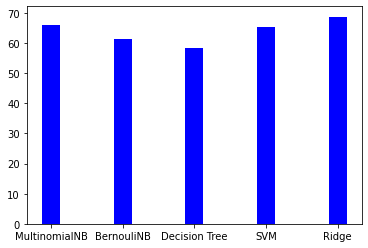

In [83]:
acc=[mnbtf,bnbtf,dttf,svmtf,rctf]
val=['MultinomialNB','BernouliNB','Decision Tree','SVM','Ridge']
plt.bar(val,acc, color='b',width=0.25)

### 3. Hashing Vectorization

Counts and frequencies can be very useful, but one limitation of these methods is that the vocabulary can become very large.

This, in turn, will require large vectors for encoding documents and impose large requirements on memory and slow down algorithms.

A clever work around is to use a one way hash of words to convert them to integers. The clever part is that no vocabulary is required and you can choose an arbitrary-long fixed length vector. A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word (which may not matter for many supervised learning tasks).

The HashingVectorizer class implements this approach that can be used to consistently hash words, then tokenize and encode documents as needed.

In [63]:
text = ["The quick brown fox jumped over the lazy dog."]

vectorizer = HashingVectorizer(n_features=20)
text_count_3 = vectorizer.fit_transform(data['comment'])
xtrain, xtest, ytrain, ytest = train_test_split(text_count_3, Y, test_size=0.2, random_state=1)

xtrain, xdev, ytrain, ydev = train_test_split(xtrain, ytrain, test_size=0.25, random_state=1) 



###  Multinomial NB

In [106]:
MNB.fit(xtrain, ytrain)
accuracy_score_mnb_hv = metrics.accuracy_score(MNB.predict(xtest), ytest)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb_hv*100))+'%')

Multinomial NB accuracy = 31.31%


In [107]:
print('Smooth Multinomial NB accuracy:', accuracy_metric(list(ydev), np.round(predicted)))

Smooth Multinomial NB accuracy: 65.982424274801


###  Bernoulli NB

In [72]:
BNB = BernoulliNB()
BNB.fit(xtrain, ytrain)
accuracy_score_bnb_hv = metrics.accuracy_score(BNB.predict(xdev),ydev)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

BNB accuracy = 28.61%


In [108]:
print('Smooth BNB accuracy: ', accuracy_metric(list(ydev), np.round(BNB.predict(xdev))))

Smooth BNB accuracy:  58.0319461509696


In [80]:
bnbhs=accuracy_metric(list(ydev), np.round(BNB.predict(xdev)))

###  Decision Tree

In [74]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=20, min_samples_leaf=5).fit(xtrain, ytrain)
predict_y = clf.predict(xdev)
dec_hv=metrics.accuracy_score(ydev, predict_y)*100
print('Decision tree accuracy: ', metrics.accuracy_score(ydev, predict_y)*100)

Decision tree accuracy:  25.269779368556012


In [109]:
print('Smooth Decision Decision Tree: ', accuracy_metric(list(ydev), np.round(predict_y)))

Smooth Decision Decision Tree:  56.506757839628186


In [81]:
dths=accuracy_metric(list(ydev), np.round(predict_y))

###  SVM

In [113]:
clf_hv = svm.LinearSVC(C=1.0, penalty='l2').fit(xtrain, ytrain)
predict_y = clf.predict(xdev)
svm_hv=metrics.accuracy_score(ydev, predict_y)*100
print('SVM accuracy: ', metrics.accuracy_score(ydev, predict_y))

SVM accuracy:  30.68


In [114]:
print('Smooth SVM accuracy: ',  accuracy_metric(list(ydev), np.round(predict_y)))

Smooth SVM accuracy:  58.67


In [122]:
svmhs=accuracy_metric(list(ydev), np.round(predict_y))

###  Ridge Classifier

In [76]:
rc = RidgeClassifier()
rc.fit(xtrain, ytrain)
score_hv = rc.score(xtrain, ytrain)

In [78]:
srv_hs=rc.predict(xdev)
print('Ridge Classifier Accuracy: ', metrics.accuracy_score(ydev, srv_hs)*100)

Ridge Classifier Accuracy:  25.299161279982908


In [89]:
print('Ridge Classifier Accuracy: ', accuracy_metric(list(ydev), np.round(srv_hs)))

Ridge Classifier Accuracy:  57.83428601955233


In [90]:
rchs=accuracy_metric(list(ydev), np.round(srv_hs))

<BarContainer object of 5 artists>

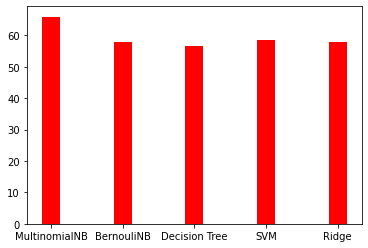

In [111]:
acc=[mnbhs,bnbhs,dths,svmhs,rchs]
val=['MultinomialNB','BernouliNB','Decision Tree','SVM','Ridge']
plt.bar(val,acc, color='r',width=0.25)

### Best Model
As we can see that the model with TF-IDF vectorization performs best among other models we will select this model as our final model.

### K-Fold Cross Validation
To get the accurate result we will run the 10-Fold cross validation on our selected model and run it on the test dataset

In [100]:
cv_scores = cross_val_score(rc, xtest, ytest, cv=5)
print("CV average score: %.2f" % (cv_scores.mean()*100))

CV average score: 25.26


### Saving the model
Now we will save the model to deploy it on our cloud hosted website

In [102]:
filename = 'tfrc.sav'
pickle.dump(rc, open(filename, 'wb'))
pickle.dump(cv, open('cv', 'wb'))
print("Model Saved")

Model Saved


### Challanges:
The main challenge was that the data was large in size and needed cleaning and an efficient way to vectorizee the data so that it can process faster. 
in order to overcome that challege I implemented and tested various vectorization methods with different algorithms to get the best output along with that i had to convert data according to those methods as the data type was different for various methods.

### Difference from the references:
My main reference to this project was https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91 which includes the brief implementation of naive bayes along with some other classifiers starting with that I have made several changes according to our data  first being different document vectorizing methods  with more algortihms such as LinearSVM and Ridge classifier along with that I trained models of each algortihm of different document vectorizing methods to get the best algorithm with good hyperparamters. to make sure of the accuracy I also ran the 5-Fold Cross validation of the test dataset to get the best results

### References:
https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91
https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/
https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
https://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.linear_model.RidgeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96